In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/KT_ETRI/

/content/drive/MyDrive/KT_ETRI


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
q1_data = pd.read_csv('Q1_train.csv')
q1_test = pd.read_csv('Q1_test.csv', index_col = 0)
q1_data.head()

,datetime,ru_id,scgfail,scgfailratio,erabaddatt,erabaddsucc,endcaddatt,endcaddsucc,endcmodbymenbatt,endcmodbymenbsucc,...,bler_ul,bler_dl,rachpreamblea,numrar,nummsg3,attpaging,rssipathavg,dlreceivedcqiavg,endcrelbymenb,uenomax
0,2023-05-19 00:00:00,BaseStationG,0,0.0,12,12,10,10,0,0,...,10.5,22.4,47.0,47.0,17.0,2243.0,-93.3,11.1,0,1
1,2023-05-19 00:00:00,BaseStationE,0,0.0,28,28,27,27,11,11,...,19.4,8.8,174.0,174.0,39.0,2240.0,-93.5,10.2,4,5
2,2023-05-19 00:00:00,BaseStationF,1,3.7,27,27,17,17,8,8,...,15.5,6.0,137.0,137.0,53.0,1337.0,-92.7,11.3,2,6
3,2023-05-19 00:00:00,BaseStationI,0,0.0,1,1,1,1,0,0,...,8.5,5.7,259.0,259.0,5.0,1401.0,-92.8,13.6,0,1
4,2023-05-19 00:00:00,BaseStationD,0,0.0,29,29,29,29,1,1,...,18.3,9.2,51.0,51.0,35.0,2083.0,-92.7,12.4,28,4


In [ ]:
q1_test.head()

,datetime,ru_id,scgfail,scgfailratio,erabaddatt,erabaddsucc,endcaddatt,endcaddsucc,endcmodbymenbatt,endcmodbymenbsucc,...,airmacdlbyte,bler_ul,bler_dl,rachpreamblea,numrar,nummsg3,attpaging,rssipathavg,dlreceivedcqiavg,endcrelbymenb
0,2023-05-19 00:00:00,BaseStationJ,0,0.0,5,5,5,5,0,0,...,412.0,13.3,22.4,73.0,73.0,7.0,1401.0,-93.0,9.8,0
1,2023-05-19 00:00:00,BaseStationB,0,0.0,3,3,3,3,0,0,...,1.0,0.0,0.0,5.0,5.0,4.0,2083.0,-92.8,5.9,4
2,2023-05-19 00:05:00,BaseStationJ,0,0.0,3,3,2,2,0,0,...,418.0,45.6,5.2,33.0,33.0,14.0,1312.0,-93.1,11.7,0
3,2023-05-19 00:05:00,BaseStationB,0,0.0,16,16,16,16,0,0,...,680.0,12.6,0.7,19.0,19.0,16.0,1936.0,-92.8,7.4,14
4,2023-05-19 00:10:00,BaseStationJ,0,0.0,4,4,4,4,0,0,...,184.0,12.9,2.8,52.0,52.0,6.0,1217.0,-93.1,11.1,0


In [ ]:
q1_data.dtypes

datetime                               object
ru_id                                  object
scgfail                                 int64
scgfailratio                          float64
erabaddatt                              int64
erabaddsucc                             int64
endcaddatt                              int64
endcaddsucc                             int64
endcmodbymenbatt                        int64
endcmodbymenbsucc                       int64
endcmodbysgnbatt                        int64
endcmodbysgnbsucc                       int64
connestabatt                            int64
connestabsucc                           int64
redirectiontolte_coverageout            int64
redirectiontolte_epsfallback            int64
redirectiontolte_emergencyfallback      int64
handoveratt                             int64
handoversucc                            int64
reestabatt                              int64
reestabsucc                             int64
rlculbyte                         

In [ ]:
q1_test.dtypes

datetime                               object
ru_id                                  object
scgfail                                 int64
scgfailratio                          float64
erabaddatt                              int64
erabaddsucc                             int64
endcaddatt                              int64
endcaddsucc                             int64
endcmodbymenbatt                        int64
endcmodbymenbsucc                       int64
endcmodbysgnbatt                        int64
endcmodbysgnbsucc                       int64
connestabatt                            int64
connestabsucc                           int64
redirectiontolte_coverageout            int64
redirectiontolte_epsfallback            int64
redirectiontolte_emergencyfallback      int64
handoveratt                             int64
handoversucc                            int64
reestabatt                              int64
reestabsucc                             int64
rlculbyte                         

#### dtype 맞게 전처리

datetime : object &rightarrow; datetime

In [ ]:
q1_data['datetime'] = pd.to_datetime(q1_data['datetime'])
q1_test['datetime'] = pd.to_datetime(q1_test['datetime'])

#### ratio 변수 통일 + 변수 drop

연결 성공한 횟수 &rightarrow; 연결 성공 백분율로 변경

In [ ]:
# 연결 성공한 횟수 -> 연결 성공 백분율로 변경
q1_data['erabaddratio'] = (q1_data['erabaddsucc'] / q1_data['erabaddatt']) * 100
q1_data['endcaddratio'] = (q1_data['endcaddsucc'] / q1_data['endcaddatt']) * 100
q1_data['endcmodbymenbratio'] = (q1_data['endcmodbymenbsucc'] / q1_data['endcmodbymenbatt']) * 100
q1_data['endcmodbysgnbratio'] = (q1_data['endcmodbysgnbsucc'] / q1_data['endcmodbysgnbatt']) * 100
q1_data['connestabratio'] = (q1_data['connestabsucc'] / q1_data['connestabatt']) * 100
q1_data['handoverratio'] = (q1_data['handoversucc'] / q1_data['handoveratt']) * 100
q1_data['reestabratio'] = (q1_data['reestabsucc'] / q1_data['reestabatt']) * 100

In [ ]:
# 연결 성공한 횟수 -> 연결 성공 백분율로 변경
q1_test['erabaddratio'] = (q1_test['erabaddsucc'] / q1_test['erabaddatt']) * 100
q1_test['endcaddratio'] = (q1_test['endcaddsucc'] / q1_test['endcaddatt']) * 100
q1_test['endcmodbymenbratio'] = (q1_test['endcmodbymenbsucc'] / q1_test['endcmodbymenbatt']) * 100
q1_test['endcmodbysgnbratio'] = (q1_test['endcmodbysgnbsucc'] / q1_test['endcmodbysgnbatt']) * 100
q1_test['connestabratio'] = (q1_test['connestabsucc'] / q1_test['connestabatt']) * 100
q1_test['handoverratio'] = (q1_test['handoversucc'] / q1_test['handoveratt']) * 100
q1_test['reestabratio'] = (q1_test['reestabsucc'] / q1_test['reestabatt']) * 100

In [ ]:
# 연결 시도한 횟수가 0이어서 성공 백분율이 nan이 된 값들을 0으로 바꿔주기
ratios = ['erabaddratio', 'endcaddratio', 'endcmodbymenbratio', 'endcmodbysgnbratio', 'connestabratio', 'handoverratio', 'reestabratio']
for i in ratios :
  q1_data[i] = q1_data[i].replace(np.nan, 0)

In [ ]:
# 연결 시도한 횟수가 0이어서 성공 백분율이 nan이 된 값들을 0으로 바꿔주기
for i in ratios :
  q1_test[i] = q1_test[i].replace(np.nan, 0)

In [ ]:
list = ['erabaddsucc', 'endcaddsucc', 'endcmodbymenbsucc', 'endcmodbysgnbsucc', 'connestabsucc', 'handoversucc', 'reestabsucc']
q1_data = q1_data.drop(list, axis = 1)

In [ ]:
q1_test = q1_test.drop(list, axis = 1)

In [ ]:
# 순서 재배치 + scgfail, redirectiontolte_emergencyfallback, numrar drop
col = q1_data.columns.to_numpy()
col = col[[0,1,3,4,32,5,33,6,34,7,35,8,36,9,10,12,37,13,38,14,15,16,17,18,19,20,21,22,23,24,26,27,28,29,30,31]]
q1_data = q1_data[col]
q1_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137445 entries, 0 to 137444
Data columns (total 36 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   datetime                      137445 non-null  datetime64[ns]
 1   ru_id                         137445 non-null  object        
 2   scgfailratio                  137445 non-null  float64       
 3   erabaddatt                    137445 non-null  int64         
 4   erabaddratio                  137445 non-null  float64       
 5   endcaddatt                    137445 non-null  int64         
 6   endcaddratio                  137445 non-null  float64       
 7   endcmodbymenbatt              137445 non-null  int64         
 8   endcmodbymenbratio            137445 non-null  float64       
 9   endcmodbysgnbatt              137445 non-null  int64         
 10  endcmodbysgnbratio            137445 non-null  float64       
 11  connestabatt 

In [ ]:
col = q1_test.columns.to_numpy()
col = col[[0,1,3,4,31,5,32,6,33,7,34,8,35,9,10,12,36,13,37,14,15,16,17,18,19,20,21,22,23,24,26,27,28,29,30]]
q1_test = q1_test[col]
q1_test.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 34362 entries, 0 to 34361
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   datetime                      34362 non-null  datetime64[ns]
 1   ru_id                         34362 non-null  object        
 2   scgfailratio                  34362 non-null  float64       
 3   erabaddatt                    34362 non-null  int64         
 4   erabaddratio                  34362 non-null  float64       
 5   endcaddatt                    34362 non-null  int64         
 6   endcaddratio                  34362 non-null  float64       
 7   endcmodbymenbatt              34362 non-null  int64         
 8   endcmodbymenbratio            34362 non-null  float64       
 9   endcmodbysgnbatt              34362 non-null  int64         
 10  endcmodbysgnbratio            34362 non-null  float64       
 11  connestabatt                

#### 결측치

test 데이터에는 결측치 없음

In [ ]:
q1_data.isna().sum()

datetime                        0
ru_id                           0
scgfailratio                    0
erabaddatt                      0
erabaddratio                    0
endcaddatt                      0
endcaddratio                    0
endcmodbymenbatt                0
endcmodbymenbratio              0
endcmodbysgnbatt                0
endcmodbysgnbratio              0
connestabatt                    0
connestabratio                  0
redirectiontolte_coverageout    0
redirectiontolte_epsfallback    0
handoveratt                     0
handoverratio                   0
reestabatt                      0
reestabratio                    0
rlculbyte                       9
rlcdlbyte                       9
totprbulavg                     9
totprbdlavg                     9
dlreceivedriavg                 9
dltransmittedmcsavg             9
airmaculbyte                    9
airmacdlbyte                    9
bler_ul                         9
bler_dl                         9
rachpreamblea 

**선형 보간법**

In [ ]:
# 결측치 전후의 패턴이 변화하는 구간인 경우에는
# 직전값, 직후값, 평균/중앙값 같은 방식으로 처리할 경우 문제가 발생
# 선형 보간법 사용해보겠음!

In [ ]:
from scipy import interpolate

In [ ]:
q1_data['rlculbyte'] = q1_data['rlculbyte'].interpolate(method='linear')
q1_data['rlcdlbyte'] = q1_data['rlcdlbyte'].interpolate(method='linear')
q1_data['totprbulavg'] = q1_data['totprbulavg'].interpolate(method='linear')
q1_data['totprbdlavg'] = q1_data['totprbdlavg'].interpolate(method='linear')
q1_data['dlreceivedriavg'] = q1_data['dlreceivedriavg'].interpolate(method='linear')
q1_data['dltransmittedmcsavg'] = q1_data['dltransmittedmcsavg'].interpolate(method='linear')
q1_data['airmaculbyte'] = q1_data['airmaculbyte'].interpolate(method='linear')
q1_data['airmacdlbyte'] = q1_data['airmacdlbyte'].interpolate(method='linear')
q1_data['bler_ul'] = q1_data['bler_ul'].interpolate(method='linear')
q1_data['bler_dl'] = q1_data['bler_dl'].interpolate(method='linear')
q1_data['rachpreamblea'] = q1_data['rachpreamblea'].interpolate(method='linear')
q1_data['nummsg3'] = q1_data['nummsg3'].interpolate(method='linear')
q1_data['attpaging'] = q1_data['attpaging'].interpolate(method='linear')
q1_data['rssipathavg'] = q1_data['rssipathavg'].interpolate(method='linear')
q1_data['dlreceivedcqiavg'] = q1_data['dlreceivedcqiavg'].interpolate(method='linear')

In [ ]:
#B,J와 유사한 기지국을 찾기 위해서 데이터 합침
q1_data_a=q1_data.iloc[:,:-1]
q1_all = pd.concat([q1_data_a,q1_test])

In [ ]:
q1_all.tail()

,datetime,ru_id,scgfailratio,erabaddatt,erabaddratio,endcaddatt,endcaddratio,endcmodbymenbatt,endcmodbymenbratio,endcmodbysgnbatt,...,airmaculbyte,airmacdlbyte,bler_ul,bler_dl,rachpreamblea,nummsg3,attpaging,rssipathavg,dlreceivedcqiavg,endcrelbymenb
34357,2023-07-17 15:40:00,BaseStationB,6.7,15,100.0,14,100.0,2,100.0,16,...,120.0,820.0,20.1,3.4,21.0,18.0,8687.0,-92.4,7.1,13
34358,2023-07-17 15:45:00,BaseStationJ,0.0,7,100.0,7,100.0,0,0.0,1,...,43.0,389.0,23.4,3.5,98.0,7.0,5441.0,-92.7,11.0,0
34359,2023-07-17 15:45:00,BaseStationB,0.0,17,100.0,15,100.0,3,100.0,26,...,122.0,26171.0,15.8,14.9,21.0,18.0,8706.0,-91.7,7.0,14
34360,2023-07-17 15:50:00,BaseStationJ,0.0,13,100.0,12,100.0,0,0.0,6,...,67.0,53.0,17.1,4.6,56.0,15.0,5751.0,-92.6,11.3,0
34361,2023-07-17 15:50:00,BaseStationB,0.0,21,100.0,21,100.0,1,100.0,23,...,78.0,22267.0,5.7,8.8,37.0,26.0,9040.0,-92.2,7.6,22


In [ ]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dataset
from torch.autograd import Variable
from torch.nn import Parameter
from torch import Tensor
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchtext
import time
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [ ]:
#int 타입 -> float 타입으로 바꿔주기
indx=[3,5,7,9,11,13,14,15,17,34]

for i in indx:
  q1_data.iloc[:, i]=q1_data.iloc[:, i].astype(float)

for i in indx:
  q1_test.iloc[:, i]=q1_test.iloc[:, i].astype(float)

q1_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137445 entries, 0 to 137444
Data columns (total 36 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   datetime                      137445 non-null  datetime64[ns]
 1   ru_id                         137445 non-null  object        
 2   scgfailratio                  137445 non-null  float64       
 3   erabaddatt                    137445 non-null  float64       
 4   erabaddratio                  137445 non-null  float64       
 5   endcaddatt                    137445 non-null  float64       
 6   endcaddratio                  137445 non-null  float64       
 7   endcmodbymenbatt              137445 non-null  float64       
 8   endcmodbymenbratio            137445 non-null  float64       
 9   endcmodbysgnbatt              137445 non-null  float64       
 10  endcmodbysgnbratio            137445 non-null  float64       
 11  connestabatt 

In [ ]:
Q1_A=q1_data[q1_data['ru_id']=='BaseStationA']
Q1_C=q1_data[q1_data['ru_id']=='BaseStationC']
Q1_D=q1_data[q1_data['ru_id']=='BaseStationD']

<ipython-input-54-946e906a1b36>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(Q1_A1.corr(), linewidths = 0.1, vmax = 1.0,


<Axes: >

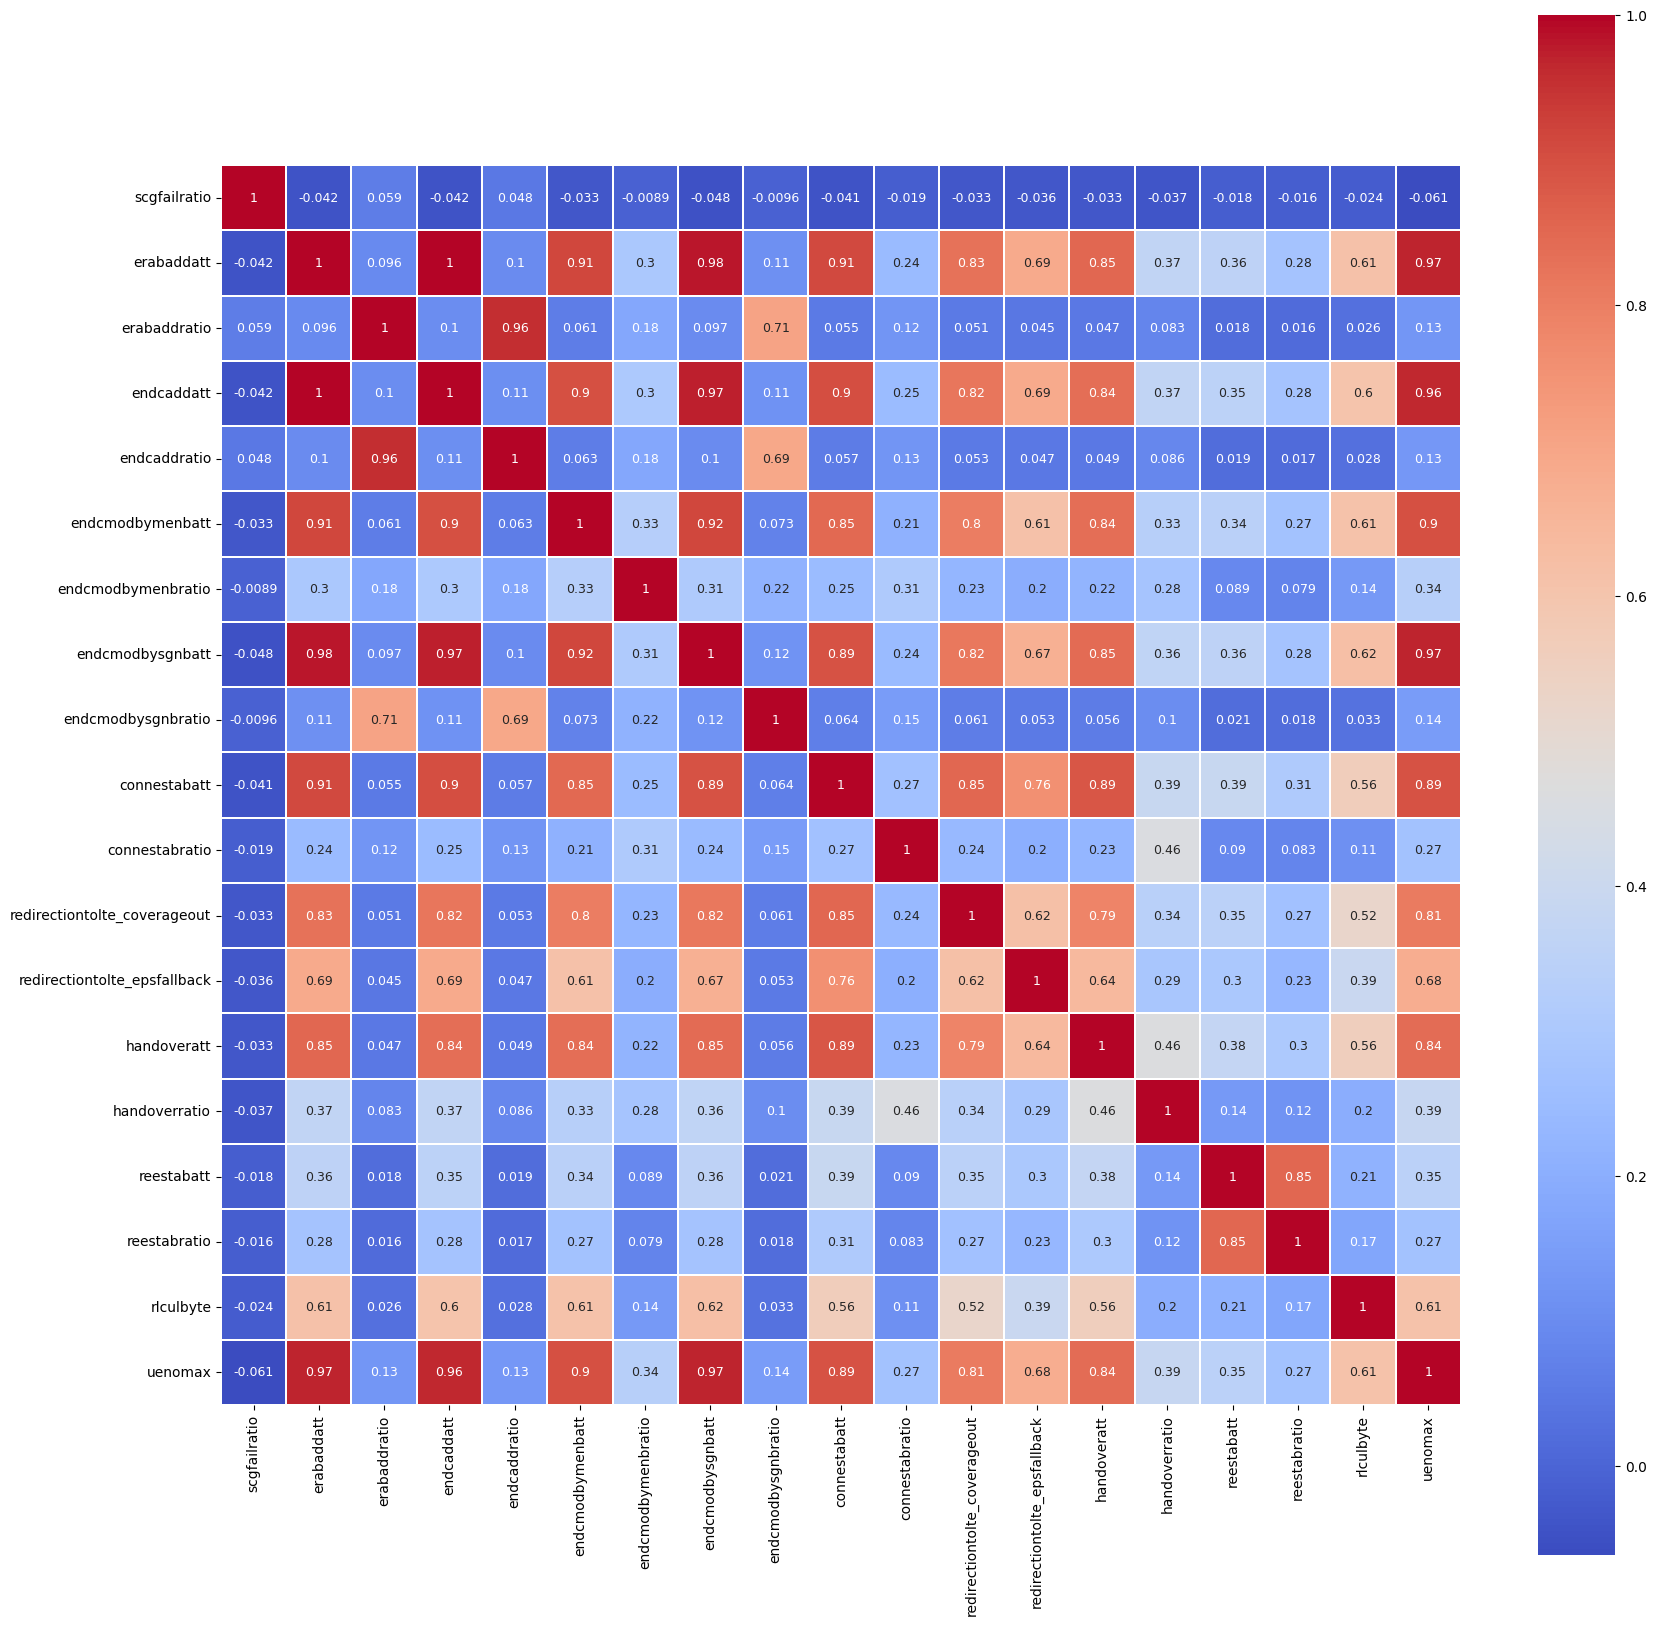

In [ ]:
Q1_A=q1_data[q1_data['ru_id']=='BaseStationA']
Q1_A=q1_data[q1_data['ru_id']=='BaseStationA']
Q1_A1=Q1_A.iloc[:,0:20]
Q1_A1 = pd.concat([Q1_A1 ,Q1_A['uenomax']],axis=1)
plt.figure(figsize=(20,20))
sns.heatmap(Q1_A1.corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = 'coolwarm', linecolor = "white", annot = True, annot_kws = {"size" : 9})

<Axes: >

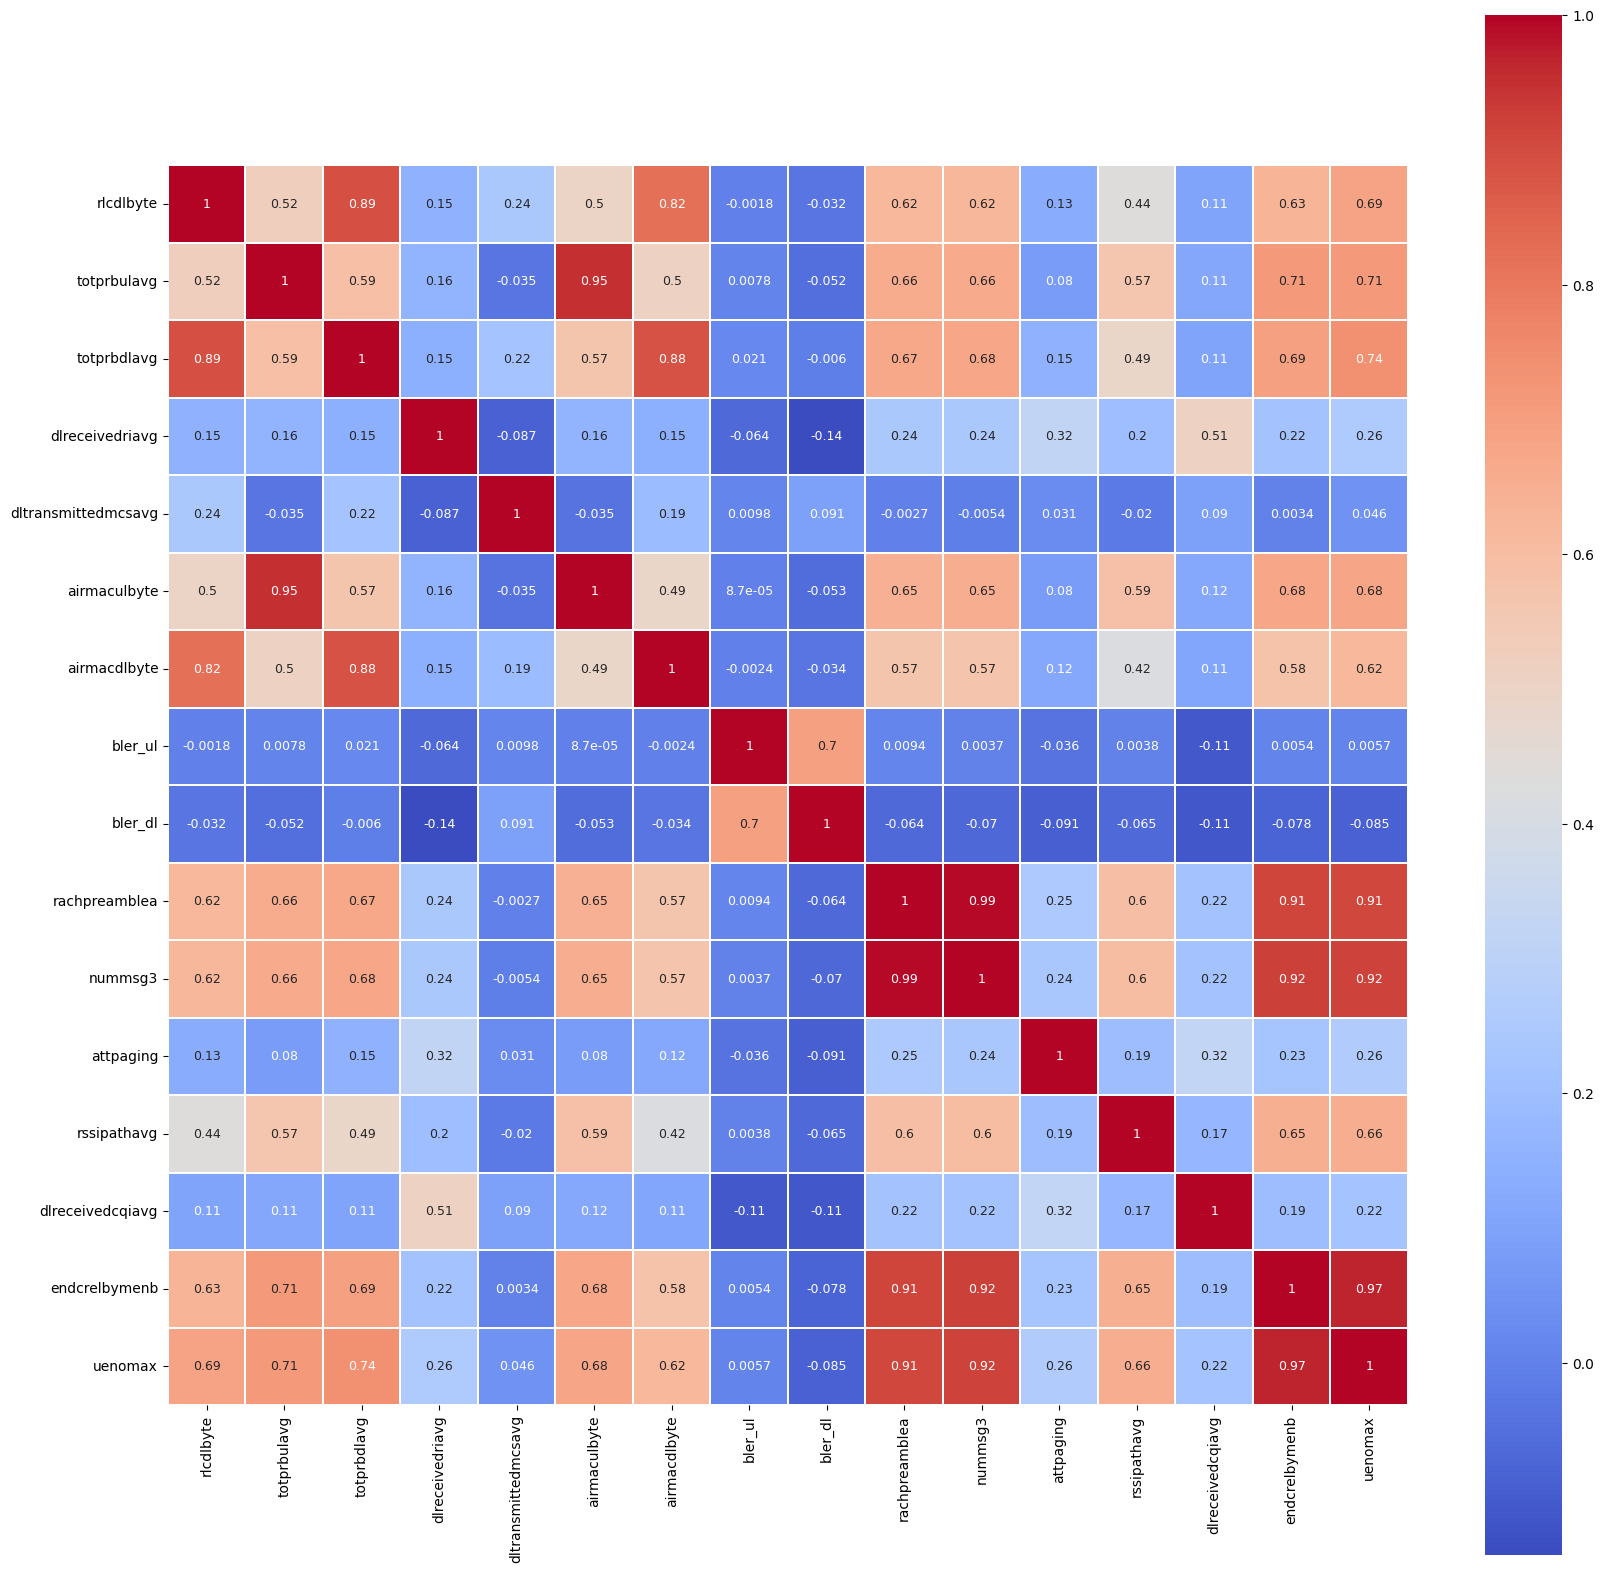

In [ ]:
Q1_A2=Q1_A.iloc[:,20:]
plt.figure(figsize=(20,20))
colormap = plt.cm.PuBu
sns.heatmap(Q1_A2.corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = 'coolwarm', linecolor = "white", annot = True, annot_kws = {"size" : 9})

# **시계열 모델링**

Text(0, 0.5, 'uenomax')

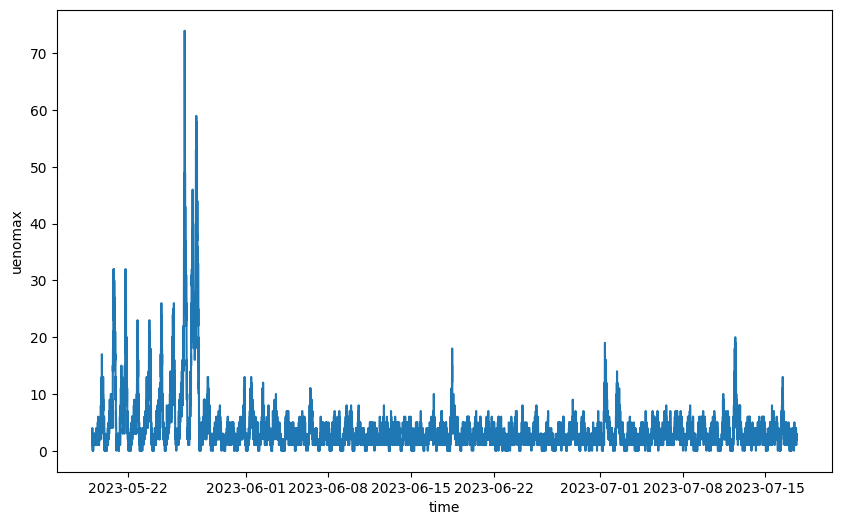

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(y=Q1_A['uenomax'], x=Q1_A['datetime'])
plt.xlabel('time')
plt.ylabel('uenomax')

Text(0, 0.5, 'uenomax')

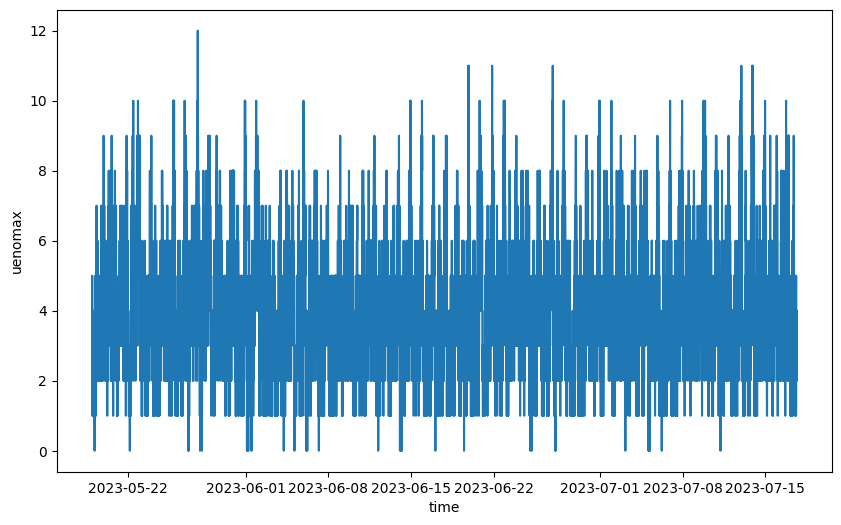

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(y=Q1_C['uenomax'], x=Q1_C['datetime'])
plt.xlabel('time')
plt.ylabel('uenomax')

**파이토치를 이용한 LSTM**

**BaseStationA**

In [ ]:
Q1_A=q1_data[q1_data['ru_id']=='BaseStationA']
Q1_C=q1_data[q1_data['ru_id']=='BaseStationC']
Q1_D=q1_data[q1_data['ru_id']=='BaseStationD']

In [ ]:
#LSTM 셀 구현
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
cuda = True if torch.cuda.is_available() else False

Tensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor

torch.manual_seed(125)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(125)

In [ ]:
import os
import time

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from torch.autograd import Variable
from tqdm import tqdm_notebook
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
Q1_A['datetime'] = pd.to_datetime(Q1_A['datetime'])
Q1_A.set_index('datetime', inplace=True)

<ipython-input-66-fd757a51353f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Q1_A['datetime'] = pd.to_datetime(Q1_A['datetime'])


In [ ]:
# 훈련과 레이블 분리
Q1_A = Q1_A.drop('ru_id', axis=1)
X=Q1_A.iloc[:,:-1]
y=Q1_A.iloc[:, [-1]]
print(X)
print(y)

                     scgfailratio  erabaddatt  erabaddratio  endcaddatt  \
datetime                                                                  
2023-05-19 00:00:00           0.0         9.0         100.0         5.0   
2023-05-19 00:05:00           8.3        12.0         100.0         9.0   
2023-05-19 00:10:00           0.0         9.0         100.0         8.0   
2023-05-19 00:15:00           0.0        11.0         100.0        10.0   
2023-05-19 00:20:00           0.0         9.0         100.0         8.0   
...                           ...         ...           ...         ...   
2023-07-17 15:30:00           0.0        33.0         100.0        30.0   
2023-07-17 15:35:00           0.0        17.0         100.0        14.0   
2023-07-17 15:40:00           5.9        17.0         100.0        16.0   
2023-07-17 15:45:00           8.3        12.0         100.0         7.0   
2023-07-17 15:50:00          16.7         6.0         100.0         6.0   

                     end

In [ ]:
# 데이터 분포 조정
ms = MinMaxScaler() # 0-1 사이에 존재하도록 분산 조정
ss = StandardScaler() # 평균0, 분산1

X_ss = ss.fit_transform(X)
y_ms = ms.fit_transform(y)

train_size = int(len(Q1_A1)*0.8)
X_train = X_ss[:train_size, :]
X_test = X_ss[train_size:, :]

y_train = y_ms[:train_size, :]
y_test = y_ms[train_size:, :]

print("Training Shape", X_train.shape, y_train.shape)
print("Testing Shape", X_test.shape, y_test.shape)

# 데이터셋 형태 및 크기 조정

#Variable로 감싸진 텐서는 .backward()가 호출될 때 자동으로 기울기가 계산
X_train_tensors = Variable(torch.Tensor(X_train))
X_test_tensors = Variable(torch.Tensor(X_test))

y_train_tensors = Variable(torch.Tensor(y_train))
y_test_tensors = Variable(torch.Tensor(y_test))

X_train_tensors_f = torch.reshape(X_train_tensors, (X_train_tensors.shape[0], 1, X_train_tensors.shape[1]))
X_test_tensors_f = torch.reshape(X_test_tensors, (X_test_tensors.shape[0], 1, X_test_tensors.shape[1]))

print("Training Shape", X_train_tensors_f.shape, y_train_tensors.shape)
print("Testing Shape", X_test_tensors_f.shape, y_test_tensors.shape)

#-----------------------------------------------------
#torch.reshape: 텐서의 형태를 바꿀 때 사용 (200,5)->(200,1,5)

Training Shape (13744, 33) (13744, 1)
Testing Shape (3437, 33) (3437, 1)
Training Shape torch.Size([13744, 1, 33]) torch.Size([13744, 1])
Testing Shape torch.Size([3437, 1, 33]) torch.Size([3437, 1])


In [ ]:
class LSTM(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(LSTM, self).__init__()
        self.num_classes = num_classes  # 클래스 개수
        self.num_layers = num_layers    # LSTM 계층의 개수
        self.input_size = input_size    # 입력 크기로 훈련 데이터셋의 칼럼 개수 의미
        self.hidden_size = hidden_size  # 은닉층의 뉴런 개수
        self.seq_length = seq_length    # 시퀀스 길이

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                          num_layers=num_layers, batch_first=True) # LSTM 계층
        self.fc_1 =  nn.Linear(hidden_size, 128)                   # 완전연결층
        self.fc = nn.Linear(128, num_classes)                      # 출력층
        self.relu = nn.ReLU()

    def forward(self,x):
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) #은닉 상태를 0으로 초기화
        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size)) #셀 상태를 0으로 초기화

        output, (hn, cn) = self.lstm(x, (h_0, c_0)) #LSTM 계층에 은닉, 셀 상태 적용
        hn = hn.view(-1, self.hidden_size)        #완전연결층 적용을 위해 데이터의 형태 조정(1차원으로 조정)
        out = self.relu(hn)
        out = self.fc_1(out)
        out = self.relu(out)
        out = self.fc(out)
        return out

In [ ]:
num_epochs = 2000
learning_rate = 0.01

input_size = 33
hidden_size = 10
num_layers = 1

num_classes = 1
model = LSTM(num_classes, input_size, hidden_size, num_layers, X_train_tensors_f.shape[1])

criterion = torch.nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
for epoch in range(num_epochs):
    outputs = model.forward(X_train_tensors_f)
    optimizer.zero_grad()
    loss = criterion(outputs, y_train_tensors)
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 0, loss: 0.13959
Epoch: 100, loss: 0.00883
Epoch: 200, loss: 0.00932
Epoch: 300, loss: 0.00812
Epoch: 400, loss: 0.00786
Epoch: 500, loss: 0.00807
Epoch: 600, loss: 0.00783
Epoch: 700, loss: 0.00770
Epoch: 800, loss: 0.00785
Epoch: 900, loss: 0.00788
Epoch: 1000, loss: 0.00760
Epoch: 1100, loss: 0.00760
Epoch: 1200, loss: 0.00779
Epoch: 1300, loss: 0.00750
Epoch: 1400, loss: 0.00785
Epoch: 1500, loss: 0.00766
Epoch: 1600, loss: 0.00776
Epoch: 1700, loss: 0.00736
Epoch: 1800, loss: 0.00732
Epoch: 1900, loss: 0.00734


MAE SCORE :  0.57318795


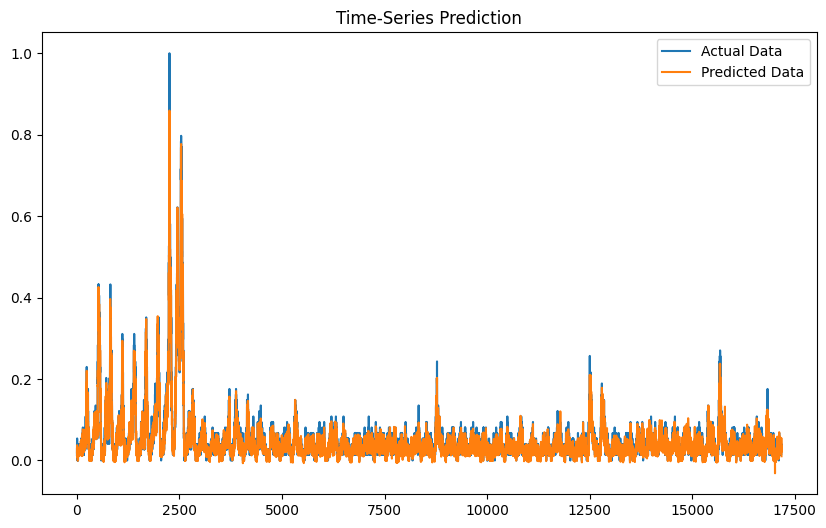

In [ ]:
df_x_ss = ss.transform(Q1_A.iloc[:, :-1])
df_y_ms = ms.transform(Q1_A.iloc[:, -1:])

df_x_ss = Variable(torch.Tensor(df_x_ss))
df_y_ms = Variable(torch.Tensor(df_y_ms))
df_x_ss = torch.reshape(df_x_ss, (df_x_ss.shape[0], 1, df_x_ss.shape[1]))

# 모델 예측 결과 출력
train_predict = model(df_x_ss)
predicted = train_predict.data.numpy()
label_y = df_y_ms.data.numpy()

predicted_inverse= ms.inverse_transform(predicted) # 정규화 해제, 그래프 본래값 출력위함
label_y_inverse = ms.inverse_transform(label_y)
plt.figure(figsize=(10,6))

def MAE(true, pred):
    return np.mean(np.abs(true-pred))

print('MAE SCORE : ', MAE(predicted_inverse, label_y_inverse))

plt.plot(label_y, label='Actual Data')
plt.plot(predicted, label='Predicted Data')
plt.title('Time-Series Prediction')
plt.legend()
plt.show()

#----------------------------------------------
#plt.axvline(x=200, c='r', linestyle='--')
#어떤 지점에 수직선을 표현할지, 어떤 색상, 어떤 스타일 (axhline:수평)

**BaseStationC 모델링**

In [ ]:
Q1_C=q1_data[q1_data['ru_id']=='BaseStationC']
Q1_C['datetime'] = pd.to_datetime(Q1_C['datetime'])
Q1_C.set_index('datetime', inplace=True)

# 훈련과 레이블 분리
Q1_C = Q1_C.drop('ru_id', axis=1)
X=Q1_C.iloc[:,:-1]
y=Q1_C.iloc[:, [-1]]
print(X)
print(y)

<ipython-input-73-f756a501b8d6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Q1_C['datetime'] = pd.to_datetime(Q1_C['datetime'])


In [ ]:
# 데이터 분포 조정
ms = MinMaxScaler() # 0-1 사이에 존재하도록 분산 조정
ss = StandardScaler() # 평균0, 분산1

X_ss = ss.fit_transform(X)
y_ms = ms.fit_transform(y)

train_size = int(len(Q1_A1)*0.8)
X_train = X_ss[:train_size, :]
X_test = X_ss[train_size:, :]

y_train = y_ms[:train_size, :]
y_test = y_ms[train_size:, :]

print("Training Shape", X_train.shape, y_train.shape)
print("Testing Shape", X_test.shape, y_test.shape)

# 데이터셋 형태 및 크기 조정

#Variable로 감싸진 텐서는 .backward()가 호출될 때 자동으로 기울기가 계산
X_train_tensors = Variable(torch.Tensor(X_train))
X_test_tensors = Variable(torch.Tensor(X_test))

y_train_tensors = Variable(torch.Tensor(y_train))
y_test_tensors = Variable(torch.Tensor(y_test))

X_train_tensors_f = torch.reshape(X_train_tensors, (X_train_tensors.shape[0], 1, X_train_tensors.shape[1]))
X_test_tensors_f = torch.reshape(X_test_tensors, (X_test_tensors.shape[0], 1, X_test_tensors.shape[1]))

print("Training Shape", X_train_tensors_f.shape, y_train_tensors.shape)
print("Testing Shape", X_test_tensors_f.shape, y_test_tensors.shape)

#-----------------------------------------------------
#torch.reshape: 텐서의 형태를 바꿀 때 사용 (200,5)->(200,1,5)

Training Shape (13744, 33) (13744, 1)
Testing Shape (3437, 33) (3437, 1)
Training Shape torch.Size([13744, 1, 33]) torch.Size([13744, 1])
Testing Shape torch.Size([3437, 1, 33]) torch.Size([3437, 1])


In [ ]:
num_epochs = 2000
learning_rate = 0.01

input_size = 33
hidden_size = 10
num_layers = 1

num_classes = 1
model = LSTM(num_classes, input_size, hidden_size, num_layers, X_train_tensors_f.shape[1])

criterion = torch.nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    outputs = model.forward(X_train_tensors_f)
    optimizer.zero_grad()
    loss = criterion(outputs, y_train_tensors)
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

MAE SCORE :  0.56715184


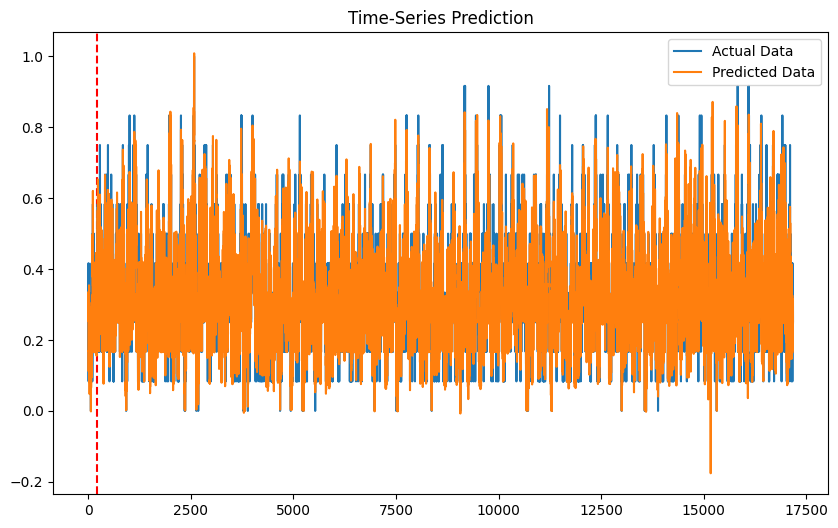

In [ ]:
df_x_ss = ss.transform(Q1_C.iloc[:, :-1])
df_y_ms = ms.transform(Q1_C.iloc[:, -1:])

df_x_ss = Variable(torch.Tensor(df_x_ss))
df_y_ms = Variable(torch.Tensor(df_y_ms))
df_x_ss = torch.reshape(df_x_ss, (df_x_ss.shape[0], 1, df_x_ss.shape[1]))

# 모델 예측 결과 출력
train_predict = model(df_x_ss)
predicted = train_predict.data.numpy()
label_y = df_y_ms.data.numpy()

predicted_inverse= ms.inverse_transform(predicted) # 정규화 해제, 그래프 본래값 출력위함
label_y_inverse = ms.inverse_transform(label_y)
plt.figure(figsize=(10,6))

def MAE(true, pred):
    return np.mean(np.abs(true-pred))

print('MAE SCORE : ', MAE(predicted_inverse, label_y_inverse))

plt.plot(label_y, label='Actual Data')
plt.plot(predicted, label='Predicted Data')
plt.title('Time-Series Prediction')
plt.legend()
plt.show()

# **GRU**

In [ ]:
class GRU(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(GRU, self).__init__()
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length

        self.gru = nn.GRU(input_size=input_size, hidden_size=hidden_size,
                          num_layers=num_layers, batch_first=True)
        self.fc_1 =  nn.Linear(hidden_size, 128)
        self.fc = nn.Linear(128, num_classes)
        self.relu = nn.ReLU()

    def forward(self,x):
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))
        #은닉 상태에 대해 0으로 초기화 하는 부분
        #GRU는 LSTM과 다르게 셀 상태를 정의하지 않음
        output, (hn) = self.gru(x, (h_0))
        hn = hn.view(-1, self.hidden_size)
        out = self.relu(hn)
        out = self.fc_1(out)
        out = self.relu(out)
        out = self.fc(out)
        return out

In [ ]:
num_epochs = 1000
learning_rate = 0.01

input_size = 33
hidden_size = 10
num_layers = 1

num_classes = 1
model = GRU(num_classes, input_size, hidden_size, num_layers, X_train_tensors_f.shape[1])

criterion = torch.nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    outputs = model.forward(X_train_tensors_f)
    optimizer.zero_grad()
    loss = criterion(outputs, y_train_tensors)
    loss.backward()

    optimizer.step()
    if epoch % 100 == 0:
        print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 0, loss: 0.39752
Epoch: 100, loss: 0.05412
Epoch: 200, loss: 0.05136
Epoch: 300, loss: 0.05026
Epoch: 400, loss: 0.04919
Epoch: 500, loss: 0.04860
Epoch: 600, loss: 0.04733
Epoch: 700, loss: 0.04656
Epoch: 800, loss: 0.04682
Epoch: 900, loss: 0.04612


MAE SCORE :  0.58415645


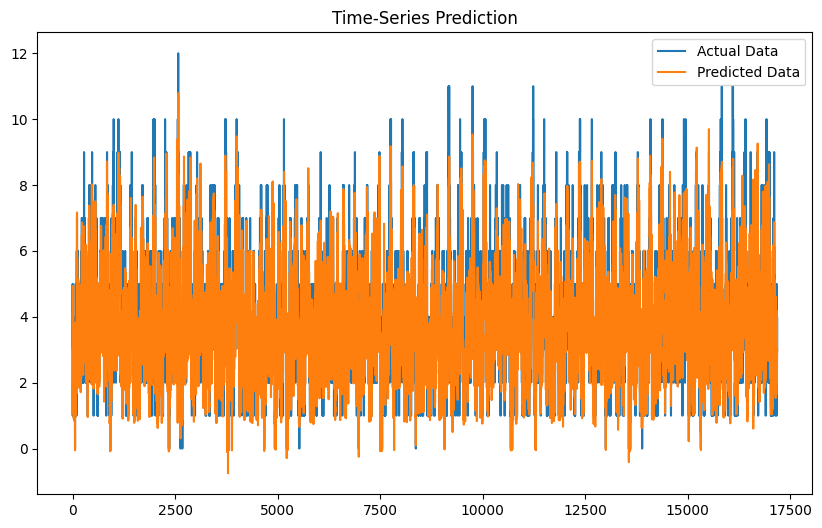

In [ ]:
df_x_ss = ss.transform(Q1_C.iloc[:, :-1])
df_y_ms = ms.transform(Q1_C.iloc[:, -1:])

df_x_ss = Variable(torch.Tensor(df_x_ss))
df_y_ms = Variable(torch.Tensor(df_y_ms))
df_x_ss = torch.reshape(df_x_ss, (df_x_ss.shape[0], 1, df_x_ss.shape[1]))

train_predict = model(df_x_ss)
predicted = train_predict.data.numpy()
label_y = df_y_ms.data.numpy()

predicted_inverse = ms.inverse_transform(predicted)
label_y_inverse = ms.inverse_transform(label_y)
plt.figure(figsize=(10,6))

def MAE(true, pred):
    return np.mean(np.abs(true-pred))

print('MAE SCORE : ', MAE(predicted_inverse, label_y_inverse))

plt.plot(label_y_inverse, label='Actual Data')
plt.plot(predicted_inverse, label='Predicted Data')
plt.title('Time-Series Prediction')
plt.legend()
plt.show()

# **양방향 LSTM**

In [ ]:
class biLSTM(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(biLSTM, self).__init__()
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length

        # bidirectional=True 양방향 lstm
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                          num_layers=num_layers, bidirectional=True, batch_first=True)
        self.fc =  nn.Linear(hidden_size*2, num_classes)
        self.relu = nn.ReLU()

    def forward(self,x):
        # 양방향 lstm은 입력데이터가 forward & backward 학습 모두에 전달되므로
        # 한번 학습하는데 두개의 계층이 필요함, 따라서 은닉, 셀, 출력층에 2를 곱함
        h_0 = Variable(torch.zeros(self.num_layers*2, x.size(0), self.hidden_size))
        c_0 = Variable(torch.zeros(self.num_layers*2, x.size(0), self.hidden_size))
        out, _ = self.lstm(x, (h_0, c_0))
        out = self.fc(out[:, -1, :])
        out = self.relu(out)
        return out

In [ ]:
num_epochs = 1000
learning_rate = 0.01

input_size = 33
hidden_size = 10
num_layers = 1

num_classes = 1
model = biLSTM(num_classes, input_size, hidden_size, num_layers, X_train_tensors_f.shape[1])

criterion = torch.nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    outputs = model.forward(X_train_tensors_f)
    optimizer.zero_grad()

    loss = criterion(outputs, y_train_tensors)
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

Epoch: 0, loss: 0.30535
Epoch: 100, loss: 0.05249
Epoch: 200, loss: 0.04955
Epoch: 300, loss: 0.04798
Epoch: 400, loss: 0.04687
Epoch: 500, loss: 0.04610
Epoch: 600, loss: 0.04550
Epoch: 700, loss: 0.04512
Epoch: 800, loss: 0.04477
Epoch: 900, loss: 0.04459


MAE SCORE :  0.56896365


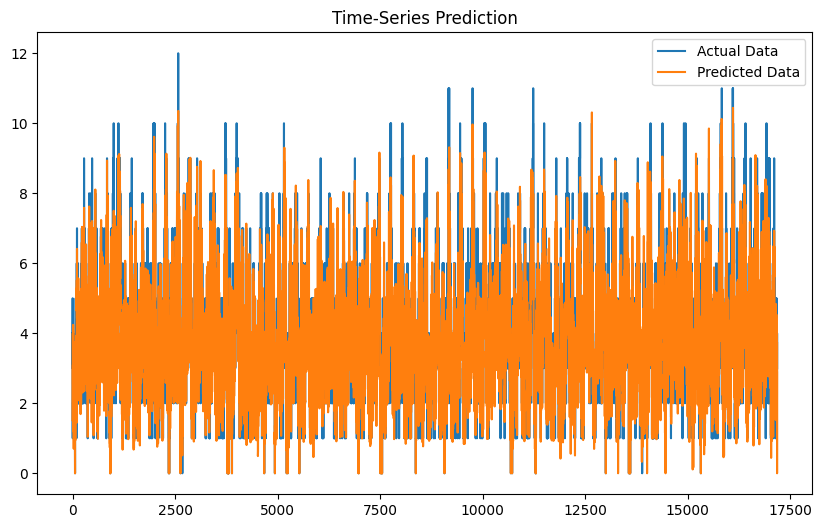

In [ ]:
df_x_ss = ss.transform(Q1_C.iloc[:, :-1])
df_y_ms = ms.transform(Q1_C.iloc[:, -1:])

df_x_ss = Variable(torch.Tensor(df_x_ss))
df_y_ms = Variable(torch.Tensor(df_y_ms))
df_x_ss = torch.reshape(df_x_ss, (df_x_ss.shape[0], 1, df_x_ss.shape[1]))

train_predict = model(df_x_ss)
predicted = train_predict.data.numpy()
label_y = df_y_ms.data.numpy()

predicted_inverse = ms.inverse_transform(predicted)
label_y_inverse = ms.inverse_transform(label_y)
plt.figure(figsize=(10,6))

def MAE(true, pred):
    return np.mean(np.abs(true-pred))

print('MAE SCORE : ', MAE(predicted_inverse, label_y_inverse))

plt.plot(label_y_inverse, label='Actual Data')
plt.plot(predicted_inverse, label='Predicted Data')
plt.title('Time-Series Prediction')
plt.legend()
plt.show()